# Using the BucketingProcess

In [11]:
%load_ext autoreload
%autoreload 2

[autoreload of skorecard.bucketers.base_bucketer failed: Traceback (most recent call last):
  File "/Users/ue86yw/Developer/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/ue86yw/Developer/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/ue86yw/Developer/miniconda3/envs/py38/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/ue86yw/Developer/miniconda3/envs/py38/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/ue86yw/ing_workspace/skorecard/skorecard/bucketers/bas

In [12]:
from skorecard import datasets
from skorecard.bucketers import DecisionTreeBucketer, OptimalBucketer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


In [13]:
from skorecard import datasets
from skorecard.bucketers import DecisionTreeBucketer, OptimalBucketer
from skorecard.pipeline import BucketingProcess

df = datasets.load_uci_credit_card(as_frame=True)
y = df["default"]
X = df.drop(columns=["default"])

num_cols = ["LIMIT_BAL", "BILL_AMT1"]
cat_cols = ["EDUCATION", "MARRIAGE"]

bucketing_process = BucketingProcess()#specials={'LIMIT_BAL': {'=400000.0' : [400000.0]}})
bucketing_process.register_prebucketing_pipeline(
                            DecisionTreeBucketer(variables=num_cols, max_n_bins=100, min_bin_size=0.05),
                            DecisionTreeBucketer(variables=cat_cols, max_n_bins=100, min_bin_size=0.05)
)
bucketing_process.register_bucketing_pipeline(
        OptimalBucketer(variables=num_cols, max_n_bins=10, min_bin_size=0.05),
        OptimalBucketer(variables=cat_cols,
                        variables_type='categorical',
                        max_n_bins=10,
                        min_bin_size=0.05),
)

bucketing_process.fit(X, y)

BucketingProcess()

In [14]:
X.head()

,EDUCATION,MARRIAGE,LIMIT_BAL,BILL_AMT1
0,1,2,400000.0,201800.0
1,2,2,80000.0,80610.0
2,1,2,500000.0,499452.0
3,1,1,140000.0,450.0
4,2,1,420000.0,56107.0


In [15]:
bucketing_process.transform(X).head()

,EDUCATION,MARRIAGE,LIMIT_BAL,BILL_AMT1
0,0,0,8,5
1,2,0,3,4
2,0,0,8,5
3,0,1,4,0
4,2,1,8,3


In [16]:
bucketing_process.prebucket_table("LIMIT_BAL")

,pre-bucket,label,Count,Count (%),Non-event,Event,Event Rate,WoE,IV,bucket
0,0,"(-inf, 25000.0)",479.0,0.079833,300.0,179.0,0.373695,0.73,0.05,0
1,1,"[25000.0, 45000.0)",370.0,0.061667,233.0,137.0,0.370270,0.71,0.04,1
2,2,"[45000.0, 55000.0)",676.0,0.112667,518.0,158.0,0.233728,0.05,0.00,2
3,3,"[55000.0, 75000.0)",336.0,0.056000,233.0,103.0,0.306548,0.43,0.01,2
4,4,"[75000.0, 85000.0)",319.0,0.053167,243.0,76.0,0.238245,0.08,0.00,3
5,5,"[85000.0, 105000.0)",330.0,0.055000,241.0,89.0,0.269697,0.25,0.00,3
6,6,"[105000.0, 145000.0)",566.0,0.094333,436.0,130.0,0.229682,0.03,0.00,4
7,7,"[145000.0, 175000.0)",449.0,0.074833,380.0,69.0,0.153675,-0.46,0.01,5
8,8,"[175000.0, 225000.0)",769.0,0.128167,630.0,139.0,0.180754,-0.27,0.01,5
9,9,"[225000.0, 275000.0)",501.0,0.083500,419.0,82.0,0.163673,-0.39,0.01,6


In [17]:
bucketing_process.prebucket_table("EDUCATION")

,pre-bucket,label,Count,Count (%),Non-event,Event,Event Rate,WoE,IV,bucket
0,0,"(-inf, 1.5)",2187.0,0.364500,1790.0,397.0,0.181527,-0.26,0.02,0
1,1,"[1.5, 2.5)",2725.0,0.454167,2037.0,688.0,0.252477,0.16,0.01,2
2,2,"[2.5, inf)",1088.0,0.181333,828.0,260.0,0.238971,0.08,0.00,1
3,3,Missing,0.0,0.000000,0.0,0.0,NaN,0.00,0.00,3


In [18]:
bucketing_process.prebucket_table("MARRIAGE")

,pre-bucket,label,Count,Count (%),Non-event,Event,Event Rate,WoE,IV,bucket
0,0,"(-inf, 1.5)",2798.0,0.466333,2120.0,678.0,0.242316,0.10,0.0,1
1,1,"[1.5, inf)",3202.0,0.533667,2535.0,667.0,0.208307,-0.09,0.0,0
2,2,Missing,0.0,0.000000,0.0,0.0,NaN,0.00,0.0,2


In [19]:
bucketing_process.bucket_table("LIMIT_BAL")

,bucket,label,Count,Count (%),Non-event,Event,Event Rate,WoE,IV
0,0,"(-inf, 1.0)",479.0,0.079833,300.0,179.0,0.373695,0.73,0.05
1,1,"[1.0, 2.0)",370.0,0.061667,233.0,137.0,0.370270,0.71,0.04
2,2,"[2.0, 4.0)",1012.0,0.168667,751.0,261.0,0.257905,0.18,0.01
3,3,"[4.0, 6.0)",649.0,0.108167,484.0,165.0,0.254237,0.17,0.00
4,4,"[6.0, 7.0)",566.0,0.094333,436.0,130.0,0.229682,0.03,0.00
5,5,"[7.0, 9.0)",1218.0,0.203000,1010.0,208.0,0.170772,-0.34,0.02
6,6,"[9.0, 10.0)",501.0,0.083500,419.0,82.0,0.163673,-0.39,0.01
7,7,"[10.0, 12.0)",729.0,0.121500,613.0,116.0,0.159122,-0.42,0.02
8,8,"[12.0, inf)",476.0,0.079333,409.0,67.0,0.140756,-0.57,0.02
9,9,Missing,0.0,0.000000,0.0,0.0,NaN,0.00,0.00


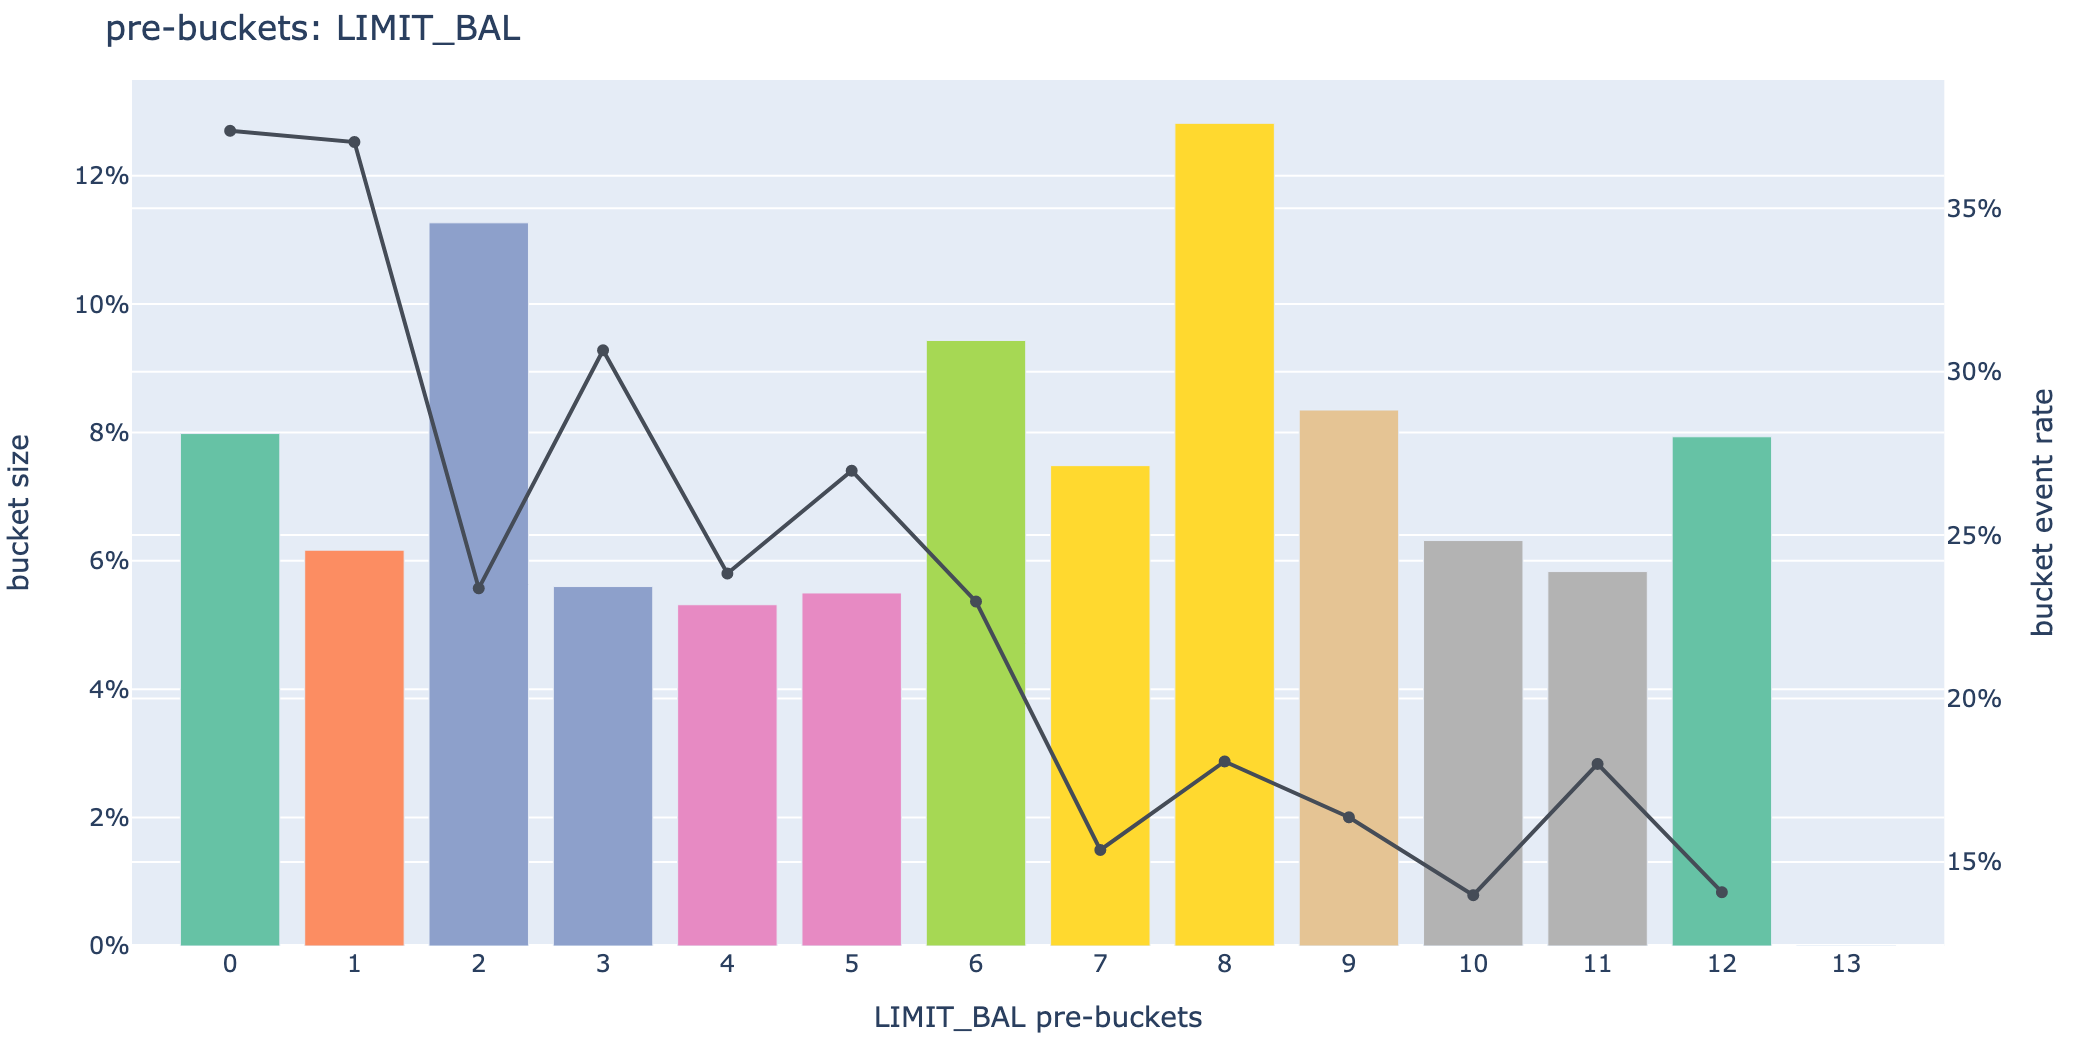

In [21]:
bucketing_process.plot_prebucket("LIMIT_BAL", format="png", scale=2, width=1050, height=525)

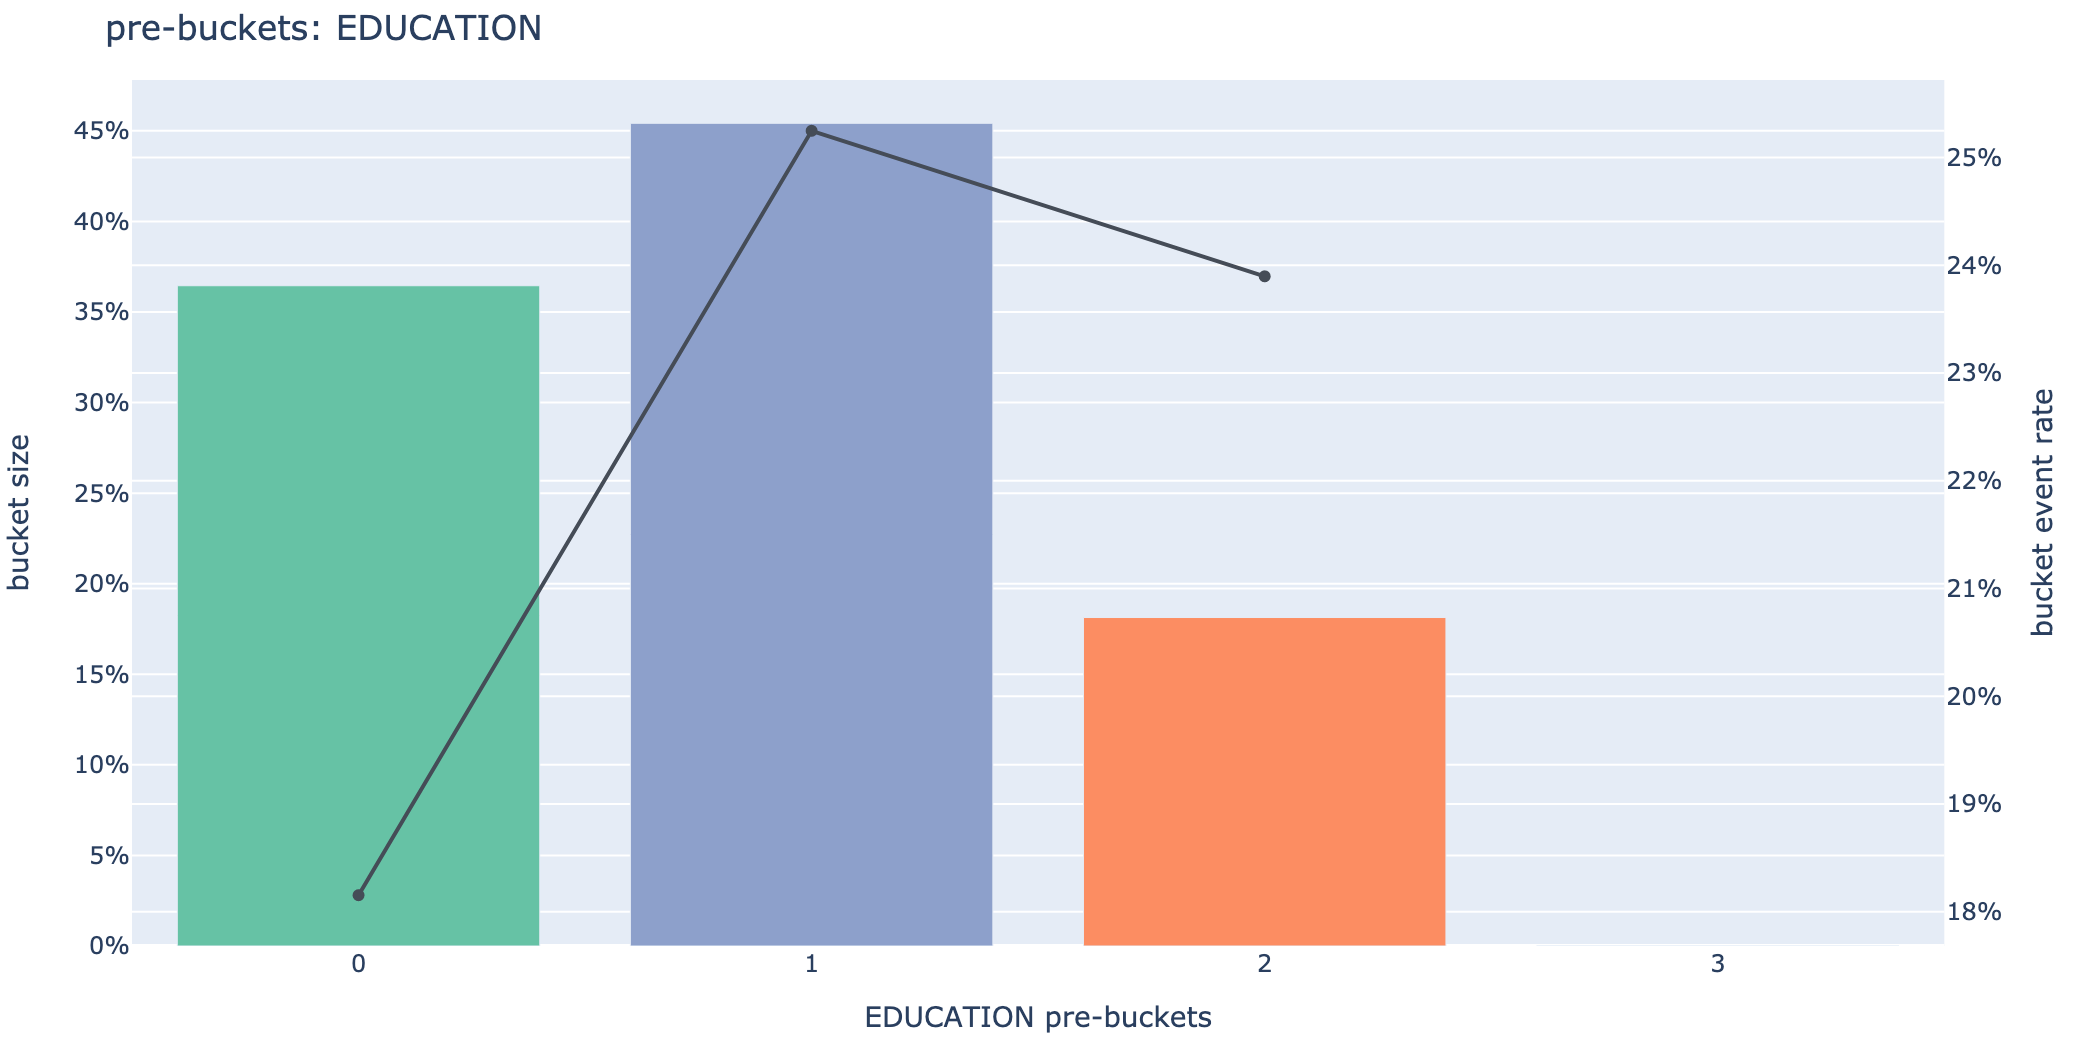

In [78]:
bucketing_process.plot_prebucket("EDUCATION", format="png", scale=2, width=1050, height=525)

In [18]:
bucketing_process.plot_bucket("LIMIT_BAL",format="png", scale=2, width=1050, height=525)

KeyError: 'Event Rate'

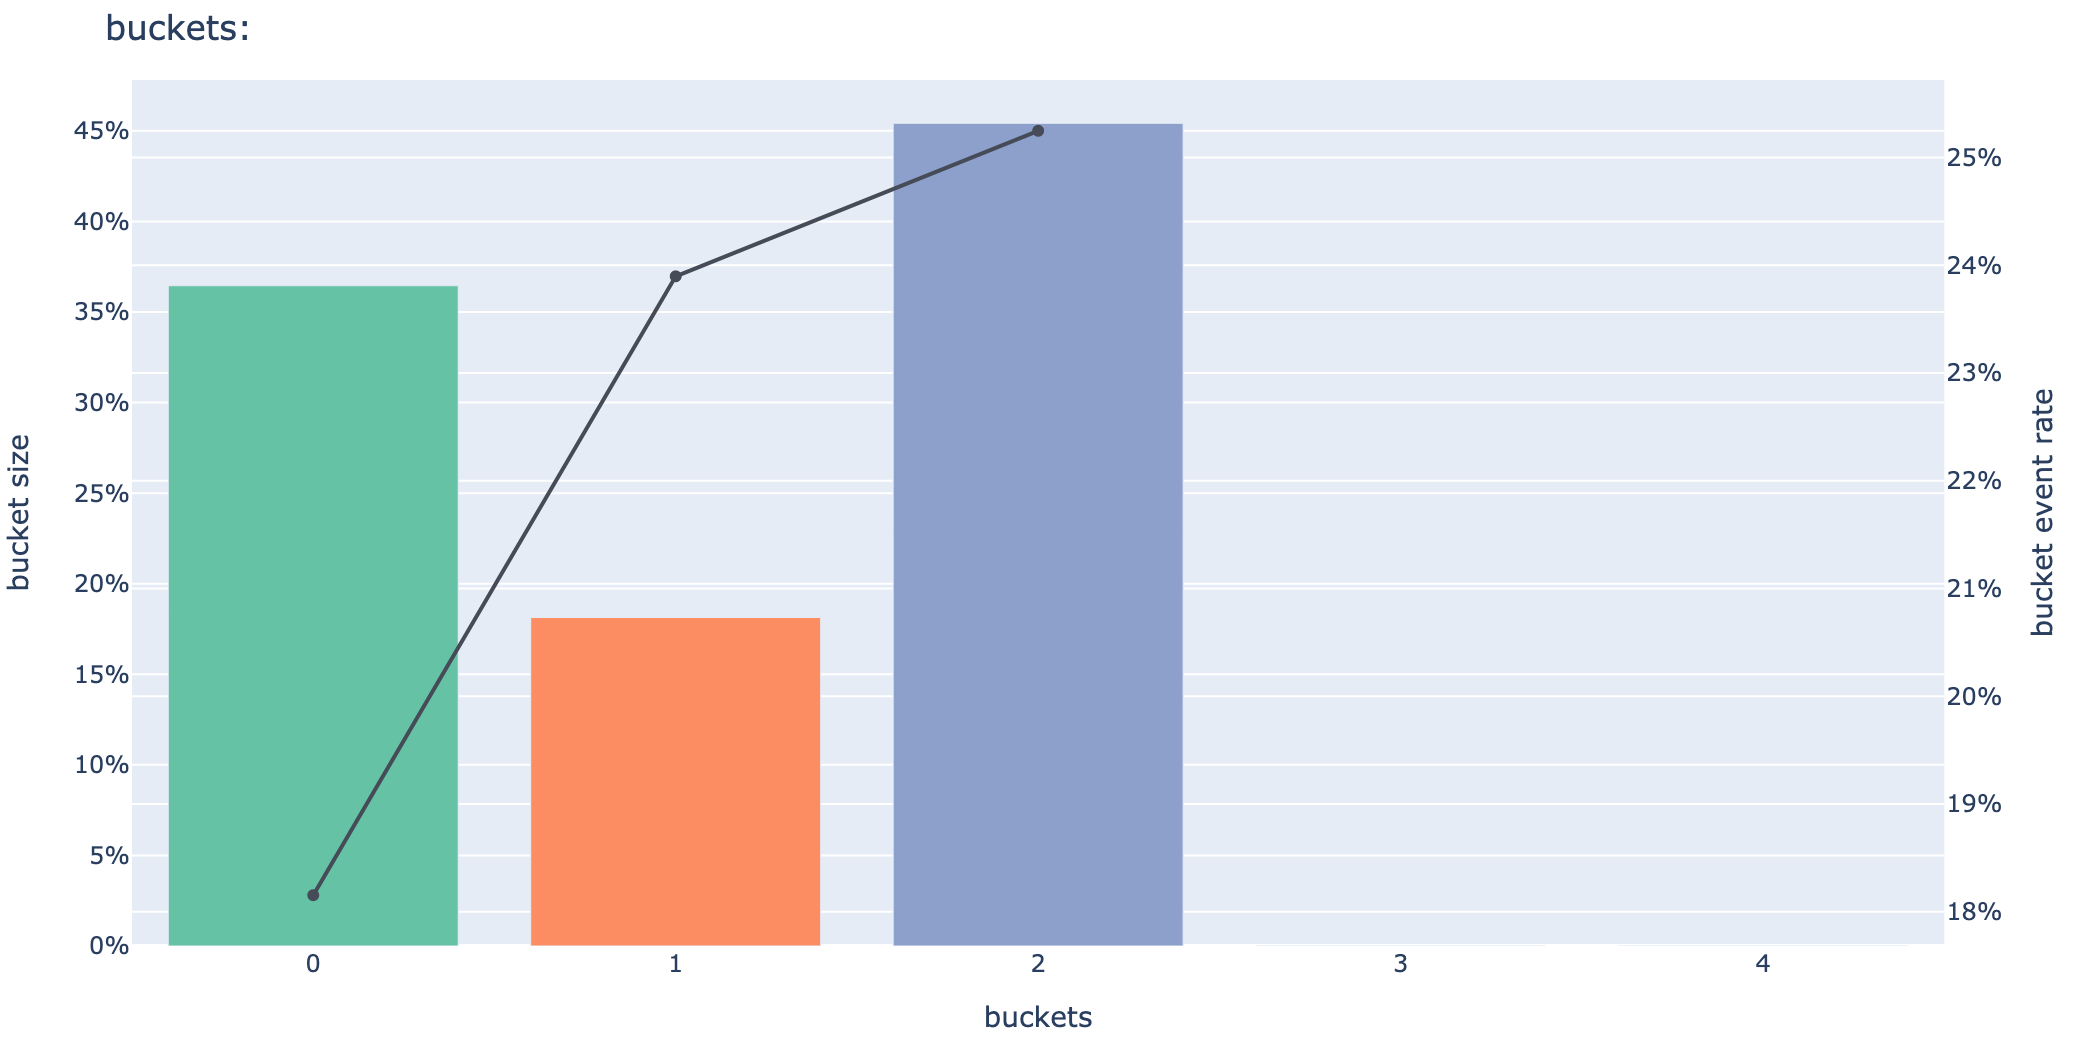

In [80]:
bucketing_process.plot_bucket("EDUCATION", format="png", scale=2, width=1050, height=525)

In [12]:
# pipeline = make_pipeline(
#     bucketing_process,
#     OneHotEncoder(),
#     LogisticRegression(),
# )
# pipeline.fit(X[num_cols], y)

In [ ]:
# from skorecard.apps import BucketTweakerApp
# tweaker = BucketTweakerApp(pipeline, X[num_cols], y)

# # Three modes to try: ['inline','external', 'jupyterlab']
# # https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e
# tweaker.run_server(mode='external', port=8051)
# # tweaker.stop_server()